In [1]:
import sys
sys.path.append("../../src")

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

## Load and preprocess data

In [4]:
import data

In [5]:
# set db path hackily
data._get_connection("../../data/participants.db")

raw_df = data.get_trials_df(data.load_raw_results(),
                            ("experiment_id", "materials_id", "item_id", "condition_id",
                             "practice_sentence"))

EXPERIMENT_ID = "08_acceptability_swarm-withprefix"
response_df = raw_df[(raw_df.experiment_id == EXPERIMENT_ID) & (raw_df.trial_type == "html-slider-response-with-copout")] \
    .reset_index().set_index(["uniqueid", "trial_index"])

Missing datastring for uid A33LYSCQQU1YDJ:31JLPPHS2VIHTNHTYQX3Y0LM83NO3X. Status was 1.
Missing datastring for uid A1VWP7HOSGKATD:37WLF8U1WQEX0FJWJ038YMGXYHE6KK. Status was 1.
Missing datastring for uid A6QDP0HAGE9W5:3V0Z7YWSIZONYPU7V25CAIA2YANV2I. Status was 1.
Missing datastring for uid A19VDBNACNJNI8:3ZY8KE4ISKR4Q8WSXDVD6085GQIQVU. Status was 1.
Missing datastring for uid AQ5TMPEPN5UIP:3QUO65DNQVC1SHUCDAT4L9BMNIZUO9. Status was 1.
Missing datastring for uid A3I1W58P6SIV26:3LEP4MGT3HOVSLUHNAYT5P7ZWFIBD3. Status was 1.
Missing datastring for uid A3V4AW6DGWBHDO:3ERET4BTVNXKIYLUH76KIW70TBHK9X. Status was 1.
Missing datastring for uid A12VDN3TJJCAQQ:33TIN5LC05YF23ABLM7BR4MBRUY9YX. Status was 1.
Missing datastring for uid A11EMV89KB6OCM:3DL65MZB8E3JUW0NX558MRV3F30EC8. Status was 1.
Missing datastring for uid A1HRH92NH49RX2:3Z4GS9HPNWYS90QHJGJR0VB8S6T77C. Status was 1.
Missing datastring for uid A29RCIFHRAZ797:33C7UALJVMMIYSGY45UODLGQ11O18G. Status was 1.
Missing datastring for uid AROOCBM

In [6]:
raw_df.experiment_id.value_counts()

04_comprehension_swarm-full                                     4953
07_comprehension_spray-load-construction-meaning-with-images    2665
05_comprehension_spray-load-construction-meaning                2624
06_production_spray-load-weight                                 1998
00_comprehension_swarm-construction-meaning                     1864
02_acceptability_swarm                                          1692
01_production_swarm-topicality                                  1564
03_production_swarm-givenness                                   1015
08_acceptability_swarm-withprefix                                423
Name: experiment_id, dtype: int64

In [7]:
# Expand condition labels, which are tuples
response_df = pd.concat([response_df, response_df.condition_id.apply(pd.Series).rename(columns=lambda x: f"condition_{x}")], axis=1) \
    .drop(columns="condition_id")

In [8]:
# Convert condition_id to independent features
response_df["agent_is_subject"] = response_df["condition_1"] == 1

In [9]:
# Norm slider values within-subject.
response_df["slider_zscore"] = \
    response_df.groupby("uniqueid").slider_value.apply(lambda xs: (xs - xs.mean()) / (xs.std(ddof=0)))

In [10]:
# dtype fixes
response_df["dateTime"] = pd.to_datetime(response_df.dateTime, unit="ms")

In [11]:
response_df.head()

condition  \
uniqueid                                      trial_index              
A2RYP5HCVKX4A6:3U5NZHP4LSQE8V0TSBZKRURN8YXPHX 3                    0   
                                              4                    0   
                                              5                    0   
                                              7                    0   
                                              8                    0   

                                                           counterbalance  \
uniqueid                                      trial_index                   
A2RYP5HCVKX4A6:3U5NZHP4LSQE8V0TSBZKRURN8YXPHX 3                         0   
                                              4                         0   
                                              5                         0   
                                              7                         0   
                                              8                         0   

                                                                             assignmentId  \
uniqueid                                      trial_index                                   
A2RYP5HCVKX4A6:3U5NZHP4LSQE8V0TSBZKRURN8YXPHX 3            3U5NZHP4LSQE8V0TSBZKRURN8YXPHX   
                                              4            3U5NZHP4LSQE8V0TSBZKRURN8YXPHX   
                                              5            3U5NZHP4LSQE8V0TSBZKRURN8YXPHX   
                                              7            3U5NZHP4LSQE8V0TSBZKRURN8YXPHX   
                                              8            3U5NZHP4LSQE8V0TSBZKRURN8YXPHX   

                                                                 workerId  \
uniqueid                                      trial_index                   
A2RYP5HCVKX4A6:3U5NZHP4LSQE8V0TSBZKRURN8YXPHX 3            A2RYP5HCVKX4A6   
                                              4            A2RYP5HCVKX4A6   
                                              5            A2RYP5HCVKX4A6   
                                              7            A2RYP5HCVKX4A6   
                                              8            A2RYP5HCVKX4A6   

                                                                                    hitId  \
uniqueid                                      trial_index                                   
A2RYP5HCVKX4A6:3U5NZHP4LSQE8V0TSBZKRURN8YXPHX 3            3XAOZ9UYRZFLHCI10X6MBS5ZY8PQ1C   
                                              4            3XAOZ9UYRZFLHCI10X6MBS5ZY8PQ1C   
                                              5            3XAOZ9UYRZFLHCI10X6MBS5ZY8PQ1C   
                                              7            3XAOZ9UYRZFLHCI10X6MBS5ZY8PQ1C   
                                              8            3XAOZ9UYRZFLHCI10X6MBS5ZY8PQ1C   

                                                                                 trial_type  \
uniqueid                                      trial_index                                     
A2RYP5HCVKX4A6:3U5NZHP4LSQE8V0TSBZKRURN8YXPHX 3            html-slider-response-with-copout   
                                              4            html-slider-response-with-copout   
                                              5            html-slider-response-with-copout   
                                              7            html-slider-response-with-copout   
                                              8            html-slider-response-with-copout   

                                                               rt  \
uniqueid                                      trial_index           
A2RYP5HCVKX4A6:3U5NZHP4LSQE8V0TSBZKRURN8YXPHX 3            7318.1   
                                              4            5306.6   
                                              5            4730.2   
                                              7            5194.7   
                                              8            4410.7   

                    

In [12]:
response_df.to_csv("raw_responses.csv")

## Preliminaries

In [13]:
subjects = set(response_df.index.get_level_values("uniqueid"))

In [14]:
len(subjects)

9

### Demo

In [15]:
qualitative_df = raw_df[(raw_df.experiment_id == EXPERIMENT_ID) & raw_df.trial_type.isin(("survey-text", "survey-multi-choice"))]

<AxesSubplot:xlabel='survey_answer', ylabel='Count'>

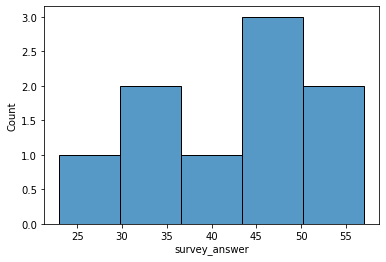

In [16]:
ages = qualitative_df[(qualitative_df.trial_type == "survey-text") & (qualitative_df.internal_node_id == "0.0-0.0")].survey_answer.astype(int)
sns.histplot(ages)

In [17]:
education = qualitative_df[(qualitative_df.trial_type == "survey-multi-choice") & (qualitative_df.survey_question_idx == 0)].survey_answer
education.value_counts()

Bachelor's degree    4
High school/GED      2
Some college         2
Master's degree      1
Name: survey_answer, dtype: int64

In [18]:
native = qualitative_df[(qualitative_df.trial_type == "survey-multi-choice") & (qualitative_df.survey_question_idx == 1)].survey_answer
native.value_counts()

Yes    9
Name: survey_answer, dtype: int64

### Comments

In [19]:
qualitative_df[(qualitative_df.trial_type == "survey-text") & (qualitative_df.internal_node_id != "0.0-0.0")].survey_answer

trial_index  uniqueid                                     
45           A2RYP5HCVKX4A6:3U5NZHP4LSQE8V0TSBZKRURN8YXPHX          Great study enjoyed taking it.
             AA7UHXL34FXUX:3AAJC4I4FHG4D5XP3K07U59GVP8JZH                                     good
             AXY0D2AMLKE2A:3SB5N7Y3O4SXKI1YRK2CRTEELQ8G0I                  thanks a lot, stay safe
             AG2YM9OWQP690:3B1NLC6UG0K08Z5I85H26UFMTYKPGY     Keep safe and have a great weekend. 
             AAXX5LDVJ32F8:3TMSXRD2X7OTOTCG28AUR1JCK64W10                                         
             A9AEW25F48DT1:31Z0PCVWUL3F7YNOWJMS5R3QJYM7TI                  GATHER MORE INFORMATION
             A1T9XW8SNUDDY7:3W8CV64QJ3NTG8KMBM3N54R83UHH9W                                        
             A2Y0WNHMT4PZ4C:3NJM2BJS4XUNRNPD6JLJG3U7V6UCPD                                    None
             ASCGS018A7IBT:37XITHEISXX8305SJBP8LYUMWOKCR7                                     none
Name: survey_answer, dtype: object

### Total times

Text(0.5, 1.0, 'Total study time (minutes)')

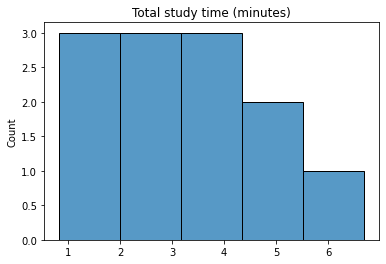

In [20]:
sns.histplot(pd.concat([response_df, qualitative_df]).groupby("uniqueid").apply(lambda rows: rows.rt.sum() / 1000 / 60))
plt.title("Total study time (minutes)")

In [21]:
pd.concat([response_df, qualitative_df]).groupby("uniqueid").rt.sum().apply(lambda xs: xs / 1000 / 60).agg(["mean", "std"])

mean    3.247291
std     1.703502
Name: rt, dtype: float64

### Response times

In [22]:
# sns.displot(data=response_df, x="rt", hue="uniqueid", kind="hist")

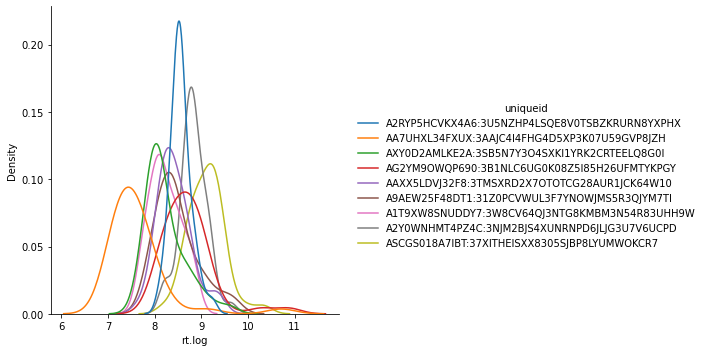

In [23]:
response_df["rt.log"] = np.log(response_df.rt)
sns.displot(data=response_df, x="rt.log", hue="uniqueid", kind="kde")

### How are people using the sliders?

- Stripplot points correspond to individual slider responses.
- Responses are grouped horizontally by subject.
- Transparent boxplots indicate filler response value for a particular subject. Red median lines / boxes indicate "good" fillers and blue indicate "bad."

<AxesSubplot:xlabel='uniqueid', ylabel='slider_value'>

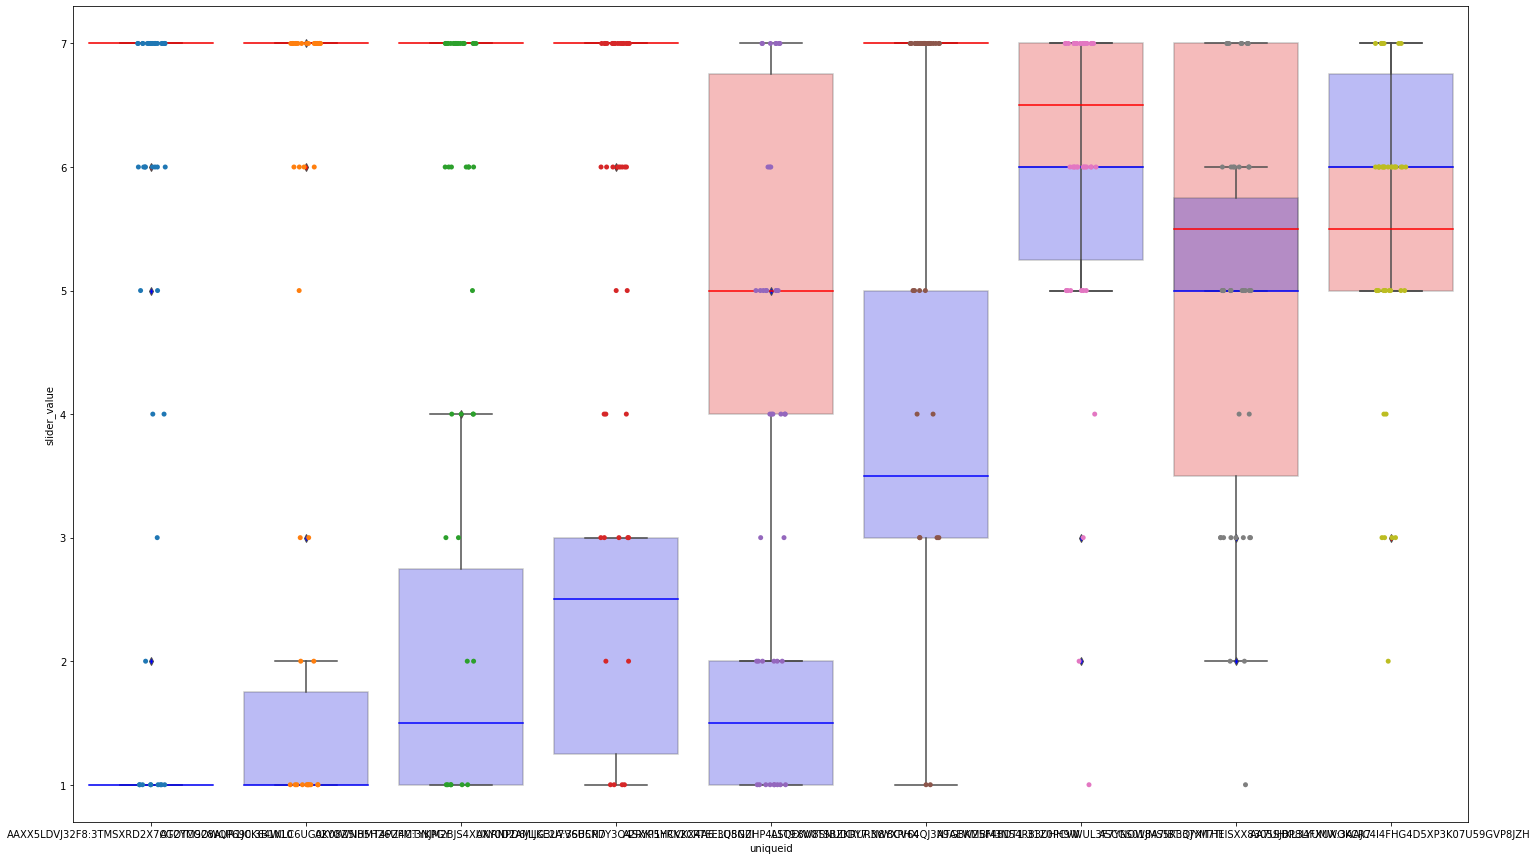

In [24]:
# Order S by descending difference between mean full-filler and empty-filler rating
filler_rows = response_df[response_df.condition_0 == "filler"]
filler_diffs = filler_rows.groupby("uniqueid").apply(
    lambda xs: xs[xs.condition_1 == "good"].slider_value.mean() - xs[xs.condition_1 == "bad"].slider_value.mean())
subject_order = filler_diffs.sort_values(ascending=False).index

plt.subplots(figsize=(25, 15))
g = sns.stripplot(data=response_df.reset_index(), x="uniqueid", y="slider_value", order=subject_order)

# plot filler responses
sns.boxplot(data=response_df[(response_df.condition_0 == "filler") & (response_df.condition_1 == "good")].reset_index(),
            x="uniqueid", y="slider_value", order=subject_order,
            color="red", medianprops=dict(color="red"), flierprops=dict(markerfacecolor="red"), boxprops=dict(alpha=0.3))
sns.boxplot(data=response_df[(response_df.condition_0 == "filler") & (response_df.condition_1 == "bad")].reset_index(),
            x="uniqueid", y="slider_value", order=subject_order, 
            color="blue", medianprops=dict(color="blue"), flierprops=dict(markerfacecolor="blue"), boxprops=dict(alpha=0.3))

## Attention checks

### Practice round

In [25]:
def compute_practice_success(subj_rows):
    """
    Compute fraction of practice sentences for which response equals
    ground truth.
    """
    practice_rows = subj_rows[~subj_rows.practice_sentence.isna()]
    practice_rows[["practice_rating", "practice_idx"]] = practice_rows.practice_sentence.str.split("-", 1, expand=True)
    success = practice_rows["practice_rating"].astype(int) == practice_rows["slider_value"]
    return success.mean()
    
practice_attention_failures = response_df.groupby("uniqueid").apply(compute_practice_success)
practice_attention_failures = practice_attention_failures[practice_attention_failures < 1]
practice_attention_failures

uniqueid
AA7UHXL34FXUX:3AAJC4I4FHG4D5XP3K07U59GVP8JZH    0.000000
AG2YM9OWQP690:3B1NLC6UG0K08Z5I85H26UFMTYKPGY    0.666667
dtype: float64

### Fillers

<AxesSubplot:xlabel='t'>

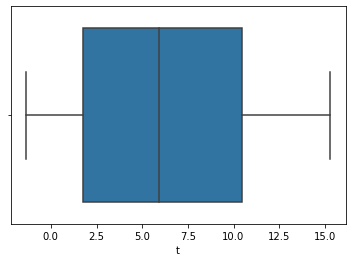

In [26]:
from scipy.stats import ttest_ind
def compute_filler_ttest(subj_rows):
    """
    sanity check: "good" items should be rated higher than "bad" filler items
    """
    filler_rows = subj_rows[subj_rows.condition_0 == "filler"]
    
    good_filler = filler_rows[filler_rows.condition_1 == "good"]
    bad_filler = filler_rows[filler_rows.condition_1 == "bad"]
    
    return pd.Series(ttest_ind(good_filler.slider_value, bad_filler.slider_value),
                     index=["t", "pval"])

filler_stats = response_df.groupby("uniqueid").apply(compute_filler_ttest)
sns.boxplot(data=filler_stats.reset_index(), x="t", hue="uniqueid")

In [27]:
filler_stats.sort_values("t")

,t,pval
uniqueid,,
AA7UHXL34FXUX:3AAJC4I4FHG4D5XP3K07U59GVP8JZH,-1.364576,1.892038e-01
ASCGS018A7IBT:37XITHEISXX8305SJBP8LYUMWOKCR7,0.541002,5.951390e-01
A9AEW25F48DT1:31Z0PCVWUL3F7YNOWJMS5R3QJYM7TI,1.767767,9.404695e-02
A2RYP5HCVKX4A6:3U5NZHP4LSQE8V0TSBZKRURN8YXPHX,4.706787,1.758166e-04
A1T9XW8SNUDDY7:3W8CV64QJ3NTG8KMBM3N54R83UHH9W,5.893636,1.402311e-05
AG2YM9OWQP690:3B1NLC6UG0K08Z5I85H26UFMTYKPGY,8.158924,1.849853e-07
A2Y0WNHMT4PZ4C:3NJM2BJS4XUNRNPD6JLJG3U7V6UCPD,10.446858,4.538550e-09
AAXX5LDVJ32F8:3TMSXRD2X7OTOTCG28AUR1JCK64W10,13.054332,1.285916e-10
AXY0D2AMLKE2A:3SB5N7Y3O4SXKI1YRK2CRTEELQ8G0I,15.293597,9.315533e-12


## Final data processing

In [28]:
exp_items = response_df[response_df.practice_sentence.isna()]

### Filter based on practice and attention checks

In [29]:
practice_drops = practice_attention_failures
drop_pct = np.round(len(practice_drops) / len(subjects) * 100 if len(practice_attention_failures) > 0 else 0, 1)
print(f"{len(practice_drops)} subjects ({drop_pct}%) disqualified and dropped due to failed practice.")
print("\t" + "\n\t".join(practice_drops.index))
exp_items = exp_items.drop(practice_drops.index, level="uniqueid")

attention_drops = filler_stats[(filler_stats.t < 0) | (filler_stats.pval > 1e-1) | filler_stats.t.isna()]
drop_pct = np.round(len(attention_drops) / len(filler_stats.index) * 100, 1)
print(f"{len(attention_drops)} subjects ({drop_pct}%, possibly overlapping with previous) disqualified and dropped due to failed attention checks.")
print("\t" + "\n\t".join(attention_drops.index))
exp_items = exp_items.drop(attention_drops.index, level="uniqueid")

2 subjects (22.2%) disqualified and dropped due to failed practice.
	AA7UHXL34FXUX:3AAJC4I4FHG4D5XP3K07U59GVP8JZH
	AG2YM9OWQP690:3B1NLC6UG0K08Z5I85H26UFMTYKPGY
2 subjects (22.2%, possibly overlapping with previous) disqualified and dropped due to failed attention checks.
	AA7UHXL34FXUX:3AAJC4I4FHG4D5XP3K07U59GVP8JZH
	ASCGS018A7IBT:37XITHEISXX8305SJBP8LYUMWOKCR7


In [30]:
print(f"{len(set(exp_items.index.get_level_values('uniqueid')))} subjects remaining.")

6 subjects remaining.


### Merge in materials

In [31]:
import json
def load_materials(mat):
    with open(f"../../materials/{mat}.json") as f:
        materials = json.load(f)
    return pd.DataFrame.from_records(materials["items"]).rename(columns={"id": "item_id"}).set_index("item_id")

materials_ids = sorted(set(exp_items.materials_id))
materials_df = pd.concat([load_materials(mat) for mat in materials_ids], names=["materials_id"], keys=materials_ids, axis=0)

materials_df["AV"] = materials_df.A.str.cat(materials_df.V, " ")

# NB this doesn't handle fillers correctly

In [32]:
keep_cols = ["A", "V", "L", "AV", "A concrete?", "A countable?"]
merged_df = pd.merge(exp_items, materials_df[keep_cols], left_on=["materials_id", "item_id"], right_index=True)

### Export

In [33]:
merged_df.to_csv("merged_df.csv")

## Analysis

<AxesSubplot:xlabel='condition', ylabel='slider_zscore'>

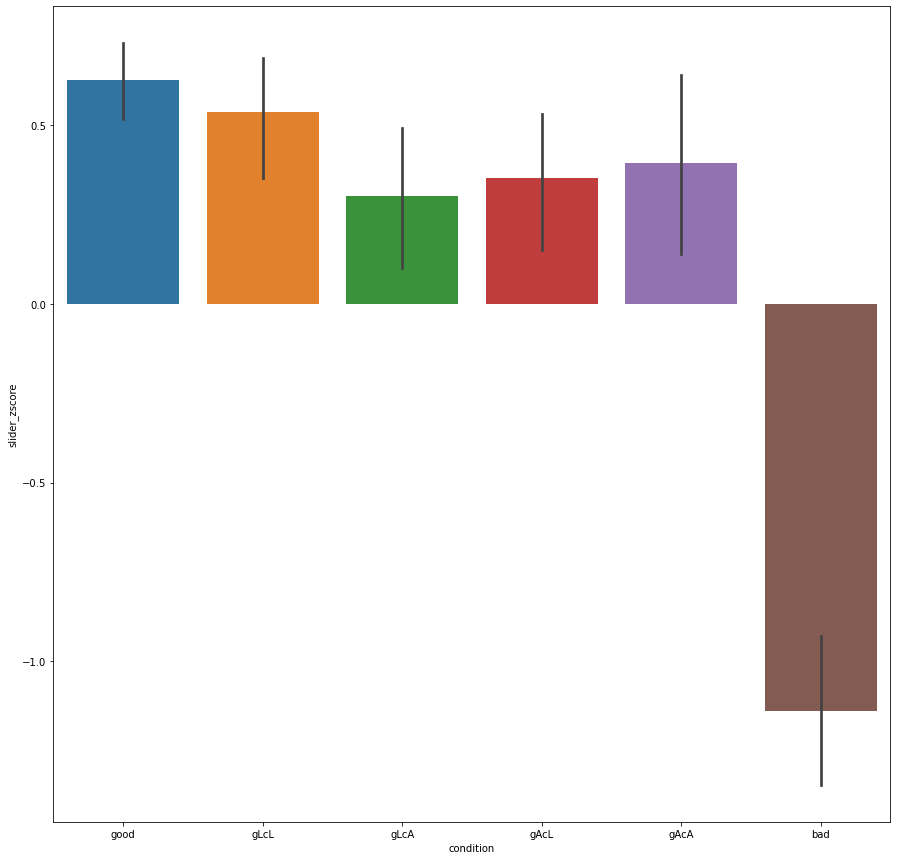

In [52]:
def condition_shortname(row):
    if row.condition_0 == "filler":
        return row.condition_1
    else:
        return "g" + ("A" if row.condition_0 == 1 else "L") + \
            "c" + ("A" if row.condition_1 == 1 else "L")
        
acceptability_df = merged_df.copy()
acceptability_df["condition"] = acceptability_df.apply(condition_shortname, axis=1)
acceptability_df = acceptability_df.reset_index().set_index(["uniqueid", "condition", "item_id"])

plt.subplots(figsize=(15, 15))
order = ["good", "gLcL", "gLcA", "gAcL", "gAcA", "bad"]
sns.barplot(data=acceptability_df.reset_index(),
            x="condition", y="slider_zscore", 
            order=hue_order)

<AxesSubplot:xlabel='uniqueid', ylabel='slider_value'>

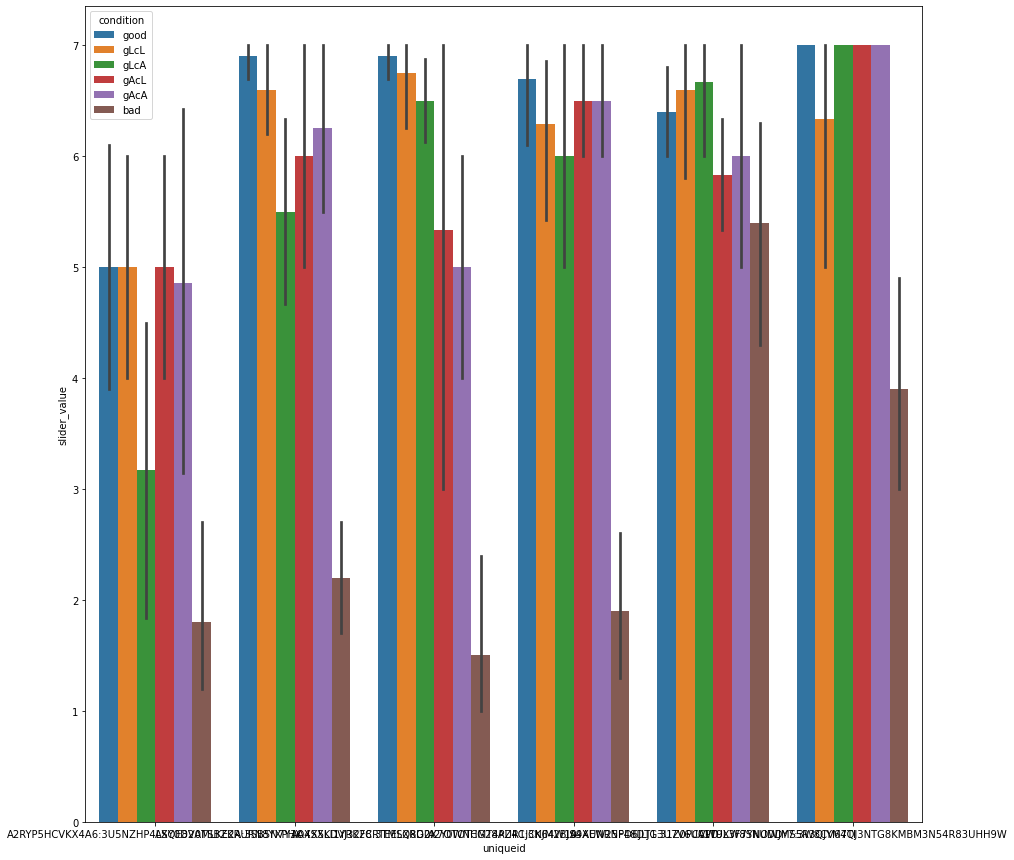

In [46]:
def condition_shortname(row):
    if row.condition_0 == "filler":
        return row.condition_1
    else:
        return "g" + ("A" if row.condition_0 == 1 else "L") + \
            "c" + ("A" if row.condition_1 == 1 else "L")
        
acceptability_df = merged_df.copy()
acceptability_df["condition"] = acceptability_df.apply(condition_shortname, axis=1)
acceptability_df = acceptability_df.reset_index().set_index(["uniqueid", "condition", "item_id"])

plt.subplots(figsize=(15, 15))
hue_order = ["good", "gLcL", "gLcA", "gAcL", "gAcA", "bad"]
sns.barplot(data=acceptability_df.reset_index(),
            x="uniqueid", y="slider_value", 
            hue="condition", hue_order=hue_order)

In [48]:
def test_within_subject(rows):
    baseline = rows[(rows.condition_0 == "filler") & (rows.condition_1 == "bad")].slider_value
    critical_rows = rows[~(rows.condition_0 == "filler")].set_index("agent_is_subject").slider_value
    
    location_t, location_pval = ttest_ind(critical_rows.loc[False], baseline)
    agent_t, agent_pval = ttest_ind(critical_rows.loc[True], baseline)
    return pd.Series({"location_t": location_t, "location_pval": location_pval,
                      "agent_t": agent_t, "agent_pval": agent_pval})
merged_df.groupby("uniqueid").apply(test_within_subject)

,location_t,location_pval,agent_t,agent_pval
uniqueid,,,,
A1T9XW8SNUDDY7:3W8CV64QJ3NTG8KMBM3N54R83UHH9W,5.153435,6.668617e-05,5.238787,8.111737e-05
A2RYP5HCVKX4A6:3U5NZHP4LSQE8V0TSBZKRURN8YXPHX,5.021167,2.340426e-04,2.835761,9.901470e-03
A2Y0WNHMT4PZ4C:3NJM2BJS4XUNRNPD6JLJG3U7V6UCPD,10.098183,4.495542e-09,9.105611,1.689127e-07
A9AEW25F48DT1:31Z0PCVWUL3F7YNOWJMS5R3QJYM7TI,1.377995,1.842186e-01,1.274523,2.218693e-01
AAXX5LDVJ32F8:3TMSXRD2X7OTOTCG28AUR1JCK64W10,6.976220,4.453612e-06,9.466074,1.264289e-08
AXY0D2AMLKE2A:3SB5N7Y3O4SXKI1YRK2CRTEELQ8G0I,10.393190,1.601963e-08,7.794229,3.544796e-07


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'excitement puls'),
  Text(1, 0, 'trepidation shak'),
  Text(2, 0, 'energy humm'),
  Text(3, 0, 'anticipation tingl'),
  Text(4, 0, 'debris flow'),
  Text(5, 0, 'bubbles foam'),
  Text(6, 0, 'people bustl'),
  Text(7, 0, 'fear prickl'),
  Text(8, 0, 'excitement crackl'),
  Text(9, 0, 'birds flutter'),
  Text(10, 0, 'lights glow'),
  Text(11, 0, 'terror cours'),
  Text(12, 0, 'frogs hopp'),
  Text(13, 0, 'sewage runn'),
  Text(14, 0, 'worms wriggl'),
  Text(15, 0, 'tadpoles swimm'),
  Text(16, 0, 'fireflies glimmer'),
  Text(17, 0, 'cockroaches creep')])

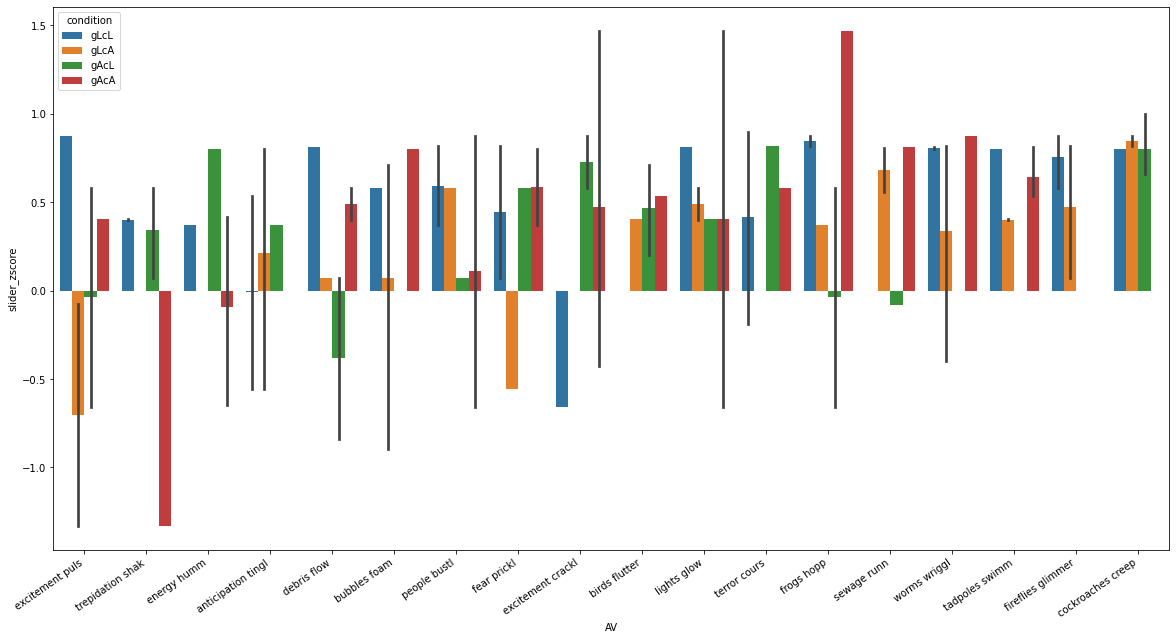

In [47]:
exp_conditions = ["gLcL", "gLcA", "gAcL", "gAcA"]
item_graph_data = acceptability_df.loc[(slice(None), exp_conditions), :].reset_index()
order = item_graph_data.groupby(["item_id", "AV"]).slider_zscore.mean().sort_values().index.get_level_values(1)

plt.subplots(figsize=(20, 10))
sns.barplot(data=item_graph_data, 
            x="AV", order=order,
            y="slider_zscore",
            hue="condition", hue_order=exp_conditions)
plt.xticks(rotation=35, ha="right")

### Item exposure

In [49]:
merged_df[merged_df.condition_0 != "filler"] \
    .groupby(["item_id", "AV", "agent_is_subject"]).size().sort_values()

item_id  AV                  agent_is_subject
19.0     bubbles foam        False               1
6.0      terror cours        True                1
39.0     sewage runn         False               1
56.0     tadpoles swimm      False               1
41.0     trepidation shak    True                1
25.0     energy humm         False               2
24.0     frogs hopp          True                2
8.0      cockroaches creep   True                2
64.0     worms wriggl        False               2
22.0     lights glow         False               2
18.0     birds flutter       True                2
30.0     fear prickl         False               3
31.0     excitement puls     True                3
20.0     fireflies glimmer   True                3
4.0      people bustl        False               3
30.0     fear prickl         True                3
17.0     debris flow         True                3
                             False               3
58.0     anticipation tingl  False  

### Concreteness

In [50]:
acceptability_df["A concrete?"]

uniqueid                                       condition  item_id
A2RYP5HCVKX4A6:3U5NZHP4LSQE8V0TSBZKRURN8YXPHX  good       27.0        True
AXY0D2AMLKE2A:3SB5N7Y3O4SXKI1YRK2CRTEELQ8G0I   good       27.0        True
AAXX5LDVJ32F8:3TMSXRD2X7OTOTCG28AUR1JCK64W10   good       27.0        True
A2Y0WNHMT4PZ4C:3NJM2BJS4XUNRNPD6JLJG3U7V6UCPD  good       27.0        True
A2RYP5HCVKX4A6:3U5NZHP4LSQE8V0TSBZKRURN8YXPHX  good       21.0        True
                                                                     ...  
A9AEW25F48DT1:31Z0PCVWUL3F7YNOWJMS5R3QJYM7TI   bad        5.0        False
A1T9XW8SNUDDY7:3W8CV64QJ3NTG8KMBM3N54R83UHH9W  bad        5.0        False
A2Y0WNHMT4PZ4C:3NJM2BJS4XUNRNPD6JLJG3U7V6UCPD  bad        5.0        False
A9AEW25F48DT1:31Z0PCVWUL3F7YNOWJMS5R3QJYM7TI   good       28.0        True
A1T9XW8SNUDDY7:3W8CV64QJ3NTG8KMBM3N54R83UHH9W  good       28.0        True
Name: A concrete?, Length: 228, dtype: object

<AxesSubplot:xlabel='condition', ylabel='slider_zscore'>

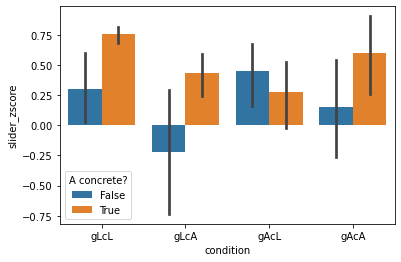

In [51]:
sns.barplot(data=acceptability_df.loc[(slice(None), exp_conditions), :].reset_index(),
            x="condition", y="slider_zscore", hue="A concrete?")